**Assignment-4 Experiment with different clustering methods**

Clustering of Youtube Data with K-MEANS and T-SNE

Link to Dataset: https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

For this assignment, a youtube dataset will be used which describes a youtubers rank, subscribers, video views, video count, category and which year the youtube channel started.

In [ ]:
# Replace 'your_file.csv' with the actual name of the uploaded file
data = pd.read_csv('most_subscribed_youtube_channels.csv')

data.head(10)

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013
5,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010
6,7,MrBeast,"102,000,000","16,832,456,681",726,Entertainment,2012
7,8,✿ Kids Diana Show,"99,700,000","79,602,288,245","1,009",People & Blogs,2015
8,9,Like Nastya,"99,200,000","81,963,845,811",702,People & Blogs,2016
9,10,Gaming,"92,700,000",0,0,NaN,2013


The data we will be looking at will be subscribers and video count for youtubers, to determine the significance of video uploads in relation to subscribers.

In [ ]:
# Remove commas from data and convert to float
data['subscribers'] = data['subscribers'].str.replace(',', '').astype(float)
data['video count'] = data['video count'].str.replace(',', '').astype(float)

# Filter the DataFrame to include only rows where 'video count' is within a certain range
data = data[data['video count'] >= 10]
data = data[data['video count'] <= 200000]

Before using the data we clean it of "," so the data can be used. Afterwards we remove some outliers in terms of video count as youtube's official channels like "Youtube Gaming" are listed as having zero video's and work differently compared to other normal channels.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


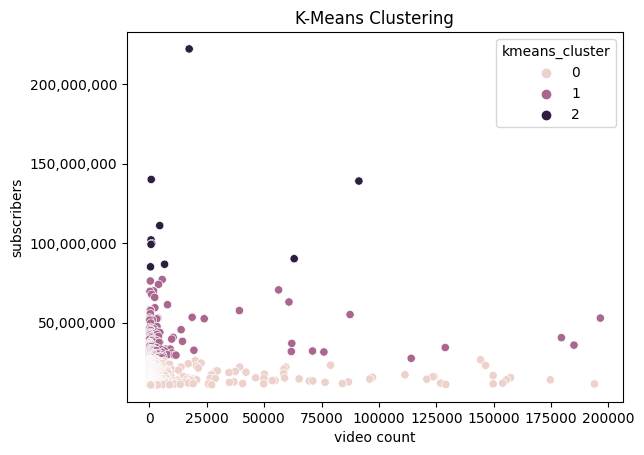

In [ ]:
# Choose the number of clusters (K) based on the Elbow Method
# You can experiment with different values of K
import matplotlib.ticker as ticker

kmeans = KMeans(n_clusters=3)
data['kmeans_cluster'] = kmeans.fit_predict(data[['subscribers', 'video count']])

# Scatter plot of K-Means clusters
sns.scatterplot(x='video count', y='subscribers', hue='kmeans_cluster', data=data)
plt.title('K-Means Clustering')
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

For the K-means result, we get some interesting results.
As seen in the graph above a high video count is not necessarily necessary to achieve a high youtuber count.

Youtubers which have a extremely high video count don't actually reach the top in terms of subscribers indicating that massively producing content isn't so effective as having fewer but likely higher quality videos.

<ipython-input-27-275beff9c089>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis')


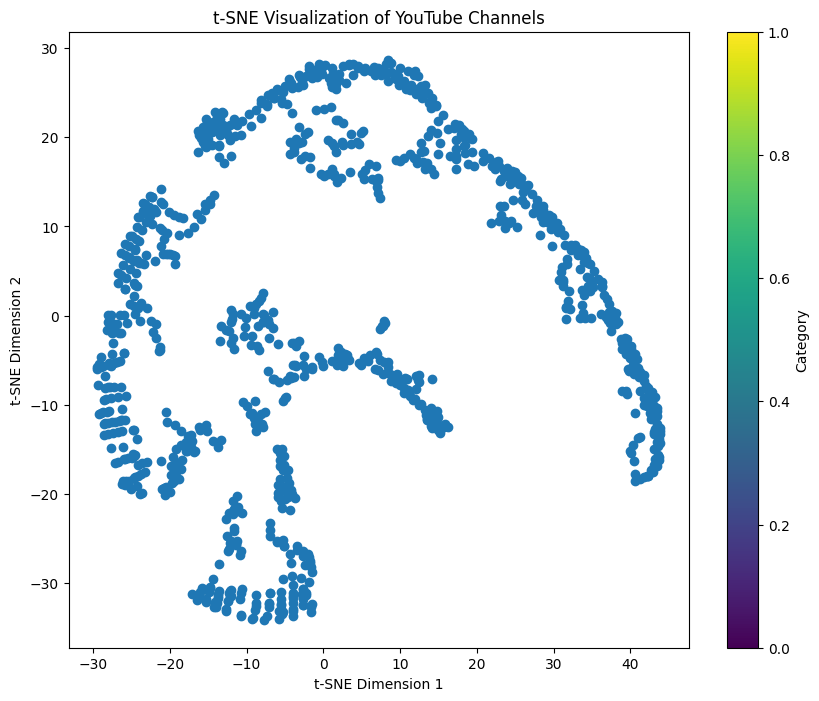

In [ ]:
from sklearn.preprocessing import StandardScaler

features = data[['subscribers', 'video count']].values

scaler = StandardScaler()
X = scaler.fit_transform(features)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

# Step 4: Visualization
plt.figure(figsize=(10, 8))

# Scatter plot with optional color-coding (for example, by category)
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['Category'], cmap='viridis')
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis')

# Add labels and title
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of YouTube Channels')

# Show the plot
plt.colorbar(label='Category')
plt.show()

For the T-sne, the data might not have had enough high-dimensionality to be relevant for a T-sne to be used, but nonetheless here's the results from the T-sne